In [0]:
!gdown https://drive.google.com/uc?id=1XDHsVl7KKwbTNSDznrVW7VpRS0Q17uGk && unzip data.zip 

Downloading...
From: https://drive.google.com/uc?id=1XDHsVl7KKwbTNSDznrVW7VpRS0Q17uGk
To: /content/data.zip
100% 880k/880k [00:00<00:00, 3.33MB/s]
Archive:  data.zip
  inflating: B1.jpg                  
  inflating: B2.jpg                  
  inflating: House1.jpg              
  inflating: House2.jpg              
  inflating: Noisyimage1.jpg         
  inflating: Noisyimage2.jpg         
 extracting: Q_3.jpg                 
  inflating: walk_1.jpg              
  inflating: walk_2.jpg              


# Anaswer to the question no:1(i)

Image successfully read...
Printing original image...
[[240 240 240 ... 249 249 249]
 [227 227 227 ... 249 249 249]
 [224 224 224 ... 249 249 249]
 ...
 [178 152 156 ...  75  54  86]
 [161 145 156 ...  62  44  74]
 [151 145 162 ...  94  80 108]]
Printing integral image...
[[     240      480      720 ...   158255   158504   158753]
 [     467      934     1401 ...   314403   314901   315399]
 [     691     1382     2073 ...   469805   470552   471299]
 ...
 [   91198   180350   268376 ... 47060140 47149369 47244159]
 [   91359   180656   268838 ... 47139308 47228581 47323445]
 [   91510   180952   269296 ... 47229008 47318361 47413333]]
Printing final image...
[[103 155 155 ... 166 166 110]
 [153 230 230 ... 249 249 166]
 [150 226 225 ... 248 248 165]
 ...
 [100 150 145 ...  54  66  42]
 [103 156 152 ...  64  75  49]
 [ 66 102 102 ...  44  51  34]]


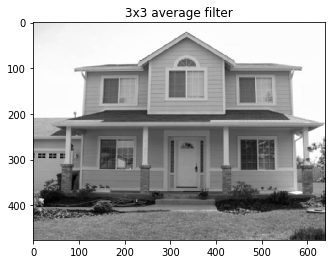

In [0]:


import numpy as np
import cv2
import sys
import getopt
import matplotlib.pyplot as plt


def readImage(filename):
 
    img = cv2.imread(filename, 0)
    if img is None:
        print('Invalid image:' + filename)
        return None
    else:
        print('Image successfully read...')
        return img


def integralImage(img):
    
    height = img.shape[0]
    width = img.shape[1]
    int_image = np.zeros((height, width), np.uint64)
    for y in range(height):
        for x in range(width):
            up = 0 if (y-1 < 0) else int_image.item((y-1, x))
            left = 0 if (x-1 < 0) else int_image.item((y, x-1))
            diagonal = 0 if (
                x-1 < 0 or y-1 < 0) else int_image.item((y-1, x-1))
            val = img.item((y, x)) + int(up) + int(left) - int(diagonal)
            int_image.itemset((y, x), val)
    return int_image


def adjustEdges(height, width, point):
  
    newPoint = [point[0], point[1]]
    if point[0] >= height:
        newPoint[0] = height - 1

    if point[1] >= width:
        newPoint[1] = width - 1
    return tuple(newPoint)


def findArea(int_img, a, b, c, d):
    
    height = int_img.shape[0]
    width = int_img.shape[1]
    a = adjustEdges(height, width, a)
    b = adjustEdges(height, width, b)
    c = adjustEdges(height, width, c)
    d = adjustEdges(height, width, d)

    a = 0 if (a[0] < 0 or a[0] >= height) or (
        a[1] < 0 or a[1] >= width) else int_img.item(a[0], a[1])
    b = 0 if (b[0] < 0 or b[0] >= height) or (
        b[1] < 0 or b[1] >= width) else int_img.item(b[0], b[1])
    c = 0 if (c[0] < 0 or c[0] >= height) or (
        c[1] < 0 or c[1] >= width) else int_img.item(c[0], c[1])
    d = 0 if (d[0] < 0 or d[0] >= height) or (
        d[1] < 0 or d[1] >= width) else int_img.item(d[0], d[1])

    return a + d - b - c


def boxFilter(img, filterSize):
   
    print("Printing original image...")
    print(img)
    height = img.shape[0]
    width = img.shape[1]
    intImg = integralImage(img)
    finalImg = np.ones((height, width), np.uint64)
    print("Printing integral image...")
    print(intImg)
    cv2.imwrite("integral_image.png", intImg)
    loc = filterSize//2
    for y in range(height):
        for x in range(width):
            finalImg.itemset((y, x), findArea(intImg, (y-loc-1, x-loc-1),
                                              (y-loc-1, x+loc), (y+loc, x-loc-1), (y+loc, x+loc))//(filterSize**2))
    print("Printing final image...")
    print(finalImg)
    plt.title('3x3 average filter')
    plt.imshow(finalImg,cmap='gray')

    cv2.imwrite("finalimage.png", finalImg)


def main():
  img = readImage("House1.jpg")
  boxFilter(img, 3) 
    


if __name__ == "__main__":
    main()


# Anaswer to the question no:1(ii)

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


def convolution(image, kernel, average=False, verbose=False):
    if len(image.shape) == 3:
        print("Found 3 Channels : {}".format(image.shape))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        print("Converted to Gray Channel. Size : {}".format(image.shape))
    else:
        print("Image Shape : {}".format(image.shape))

    print("Kernel Shape : {}".format(kernel.shape))

    if verbose:
        plt.imshow(image, cmap='gray')
        plt.title("Image")
        plt.show()

    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape

    output = np.zeros(image.shape)

    pad_height = int((kernel_row - 1) / 2)
    pad_width = int((kernel_col - 1) / 2)

    padded_image = np.zeros(
        (image_row + (2 * pad_height), image_col + (2 * pad_width)))

    padded_image[pad_height:padded_image.shape[0] - pad_height,
                 pad_width:padded_image.shape[1] - pad_width] = image

    if verbose:
        plt.imshow(padded_image, cmap='gray')
        plt.title("Padded Image")
        plt.show()

    for row in range(image_row):
        for col in range(image_col):
            output[row, col] = np.sum(
                kernel * padded_image[row:row + kernel_row, col:col + kernel_col])
            if average:
                output[row, col] /= kernel.shape[0] * kernel.shape[1]

    print("Output Image size : {}".format(output.shape))

    if verbose:
        plt.imshow(output, cmap='gray')
        plt.title("Output Image using {}X{} Kernel".format(
            kernel_row, kernel_col))
        plt.show()

    return output


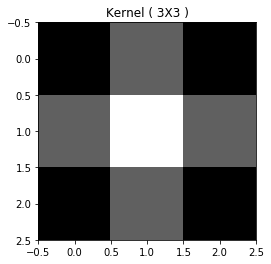

Found 3 Channels : (476, 640, 3)
Converted to Gray Channel. Size : (476, 640)
Kernel Shape : (3, 3)


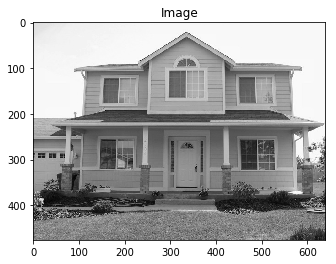

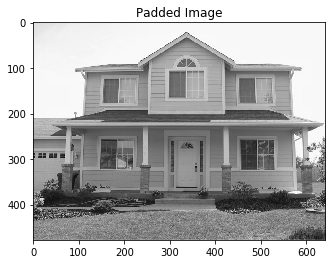

Output Image size : (476, 640)


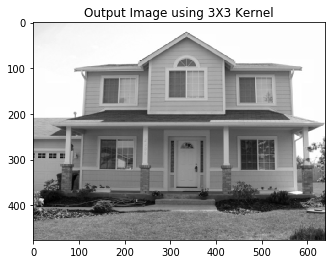

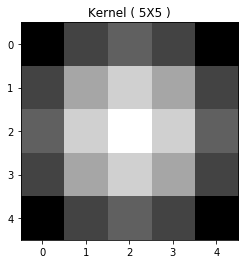

Found 3 Channels : (476, 640, 3)
Converted to Gray Channel. Size : (476, 640)
Kernel Shape : (5, 5)


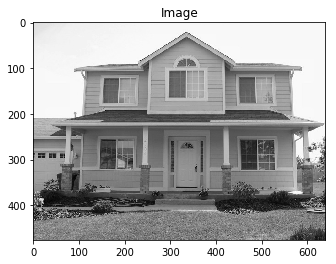

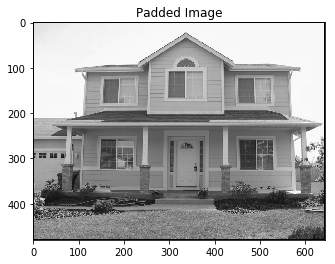

Output Image size : (476, 640)


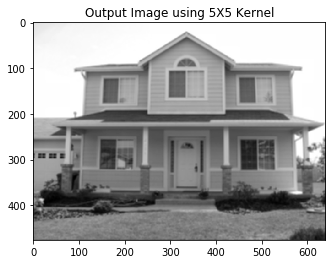

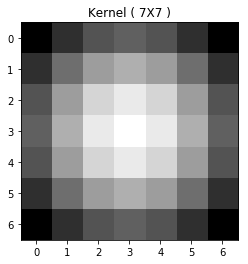

Found 3 Channels : (476, 640, 3)
Converted to Gray Channel. Size : (476, 640)
Kernel Shape : (7, 7)


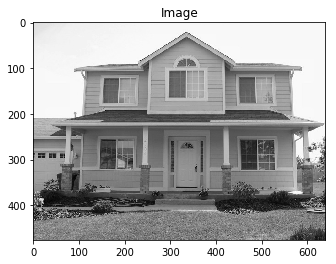

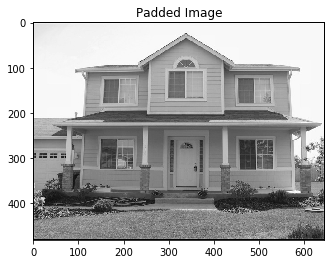

Output Image size : (476, 640)


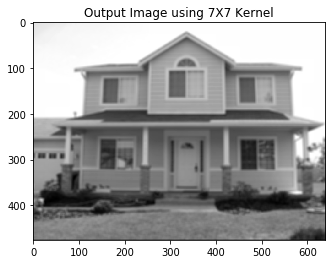

In [0]:
import numpy as np
import cv2
import argparse
import matplotlib.pyplot as plt
import math



def dnorm(x, mu, sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - mu) / sd, 2) / 2)


def gaussian_kernel(size, sigma, verbose=False):
    kernel_1D = np.linspace(-(size // 2), size // 2, size)
    for i in range(size):
        kernel_1D[i] = dnorm(kernel_1D[i], 0, sigma)
    kernel_2D = np.outer(kernel_1D.T, kernel_1D.T)

    kernel_2D *= 1.0 / kernel_2D.max()

    if verbose:
        plt.imshow(kernel_2D, interpolation='none', cmap='gray')
        plt.title("Kernel ( {}X{} )".format(size, size))
        plt.show()

    return kernel_2D

# sigma=math.sqrt(kernel_size)


def gaussian_blur(image, kernel_size, sigma, verbose=False):
    kernel = gaussian_kernel(
        kernel_size, sigma, verbose=verbose)
    return convolution(image, kernel, average=True, verbose=verbose)


if __name__ == '__main__':
   
    image =cv2.imread('B1.jpg')
    
    for sigma in range(1,4):
      kernel_size = (2*sigma + 1)
      gaussian_blur(image, kernel_size, sigma, verbose=True)

   



    

# Anaswer to the question no:1(iii)

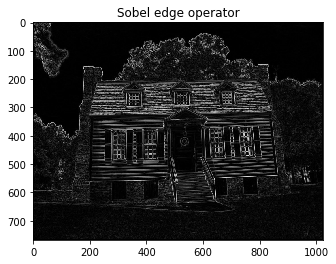

In [0]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Open the image
img = np.array(Image.open('B2.jpg')).astype(np.uint8)

# Apply gray scale
gray_img = np.round(0.299 * img[:, :, 0] +
                    0.587 * img[:, :, 1] +
                    0.114 * img[:, :, 2]).astype(np.uint8)

# Sobel Operator
h, w = gray_img.shape
# define filters
horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  # s2
vertical = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])  # s1

# define images with 0s
newhorizontalImage = np.zeros((h, w))
newverticalImage = np.zeros((h, w))
newgradientImage = np.zeros((h, w))

# offset by 1
for i in range(1, h - 1):
    for j in range(1, w - 1):
        horizontalGrad = (horizontal[0, 0] * gray_img[i - 1, j - 1]) + \
                         (horizontal[0, 1] * gray_img[i - 1, j]) + \
                         (horizontal[0, 2] * gray_img[i - 1, j + 1]) + \
                         (horizontal[1, 0] * gray_img[i, j - 1]) + \
                         (horizontal[1, 1] * gray_img[i, j]) + \
                         (horizontal[1, 2] * gray_img[i, j + 1]) + \
                         (horizontal[2, 0] * gray_img[i + 1, j - 1]) + \
                         (horizontal[2, 1] * gray_img[i + 1, j]) + \
                         (horizontal[2, 2] * gray_img[i + 1, j + 1])

        newhorizontalImage[i - 1, j - 1] = abs(horizontalGrad)

        verticalGrad = (vertical[0, 0] * gray_img[i - 1, j - 1]) + \
                       (vertical[0, 1] * gray_img[i - 1, j]) + \
                       (vertical[0, 2] * gray_img[i - 1, j + 1]) + \
                       (vertical[1, 0] * gray_img[i, j - 1]) + \
                       (vertical[1, 1] * gray_img[i, j]) + \
                       (vertical[1, 2] * gray_img[i, j + 1]) + \
                       (vertical[2, 0] * gray_img[i + 1, j - 1]) + \
                       (vertical[2, 1] * gray_img[i + 1, j]) + \
                       (vertical[2, 2] * gray_img[i + 1, j + 1])

        newverticalImage[i - 1, j - 1] = abs(verticalGrad)

        # Edge Magnitude
        mag = np.sqrt(pow(horizontalGrad, 2.0) + pow(verticalGrad, 2.0))
        newgradientImage[i - 1, j - 1] = mag

plt.figure()
plt.title('Sobel edge operator')
plt.imsave('sobel_edge_operator.jpg', newgradientImage, cmap='gray', format='png')
plt.imshow(newgradientImage, cmap='gray')
plt.show()

# Anaswer to the question no:1(iv)

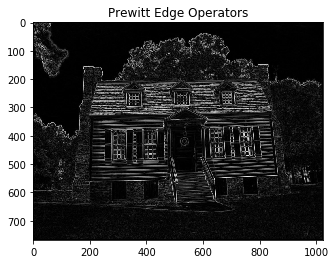

In [0]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Open the image
img = np.array(Image.open('B2.jpg')).astype(np.uint8)

# Apply gray scale
gray_img = np.round(0.299 * img[:, :, 0] +
                    0.587 * img[:, :, 1] +
                    0.114 * img[:, :, 2]).astype(np.uint8)

# Prewitt Operator
h, w = gray_img.shape
# define filters
horizontal = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])  # s2
vertical = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])  # s1

# define images with 0s
newgradientImage = np.zeros((h, w))

# offset by 1
for i in range(1, h - 1):
    for j in range(1, w - 1):
        horizontalGrad = (horizontal[0, 0] * gray_img[i - 1, j - 1]) + \
                         (horizontal[0, 1] * gray_img[i - 1, j]) + \
                         (horizontal[0, 2] * gray_img[i - 1, j + 1]) + \
                         (horizontal[1, 0] * gray_img[i, j - 1]) + \
                         (horizontal[1, 1] * gray_img[i, j]) + \
                         (horizontal[1, 2] * gray_img[i, j + 1]) + \
                         (horizontal[2, 0] * gray_img[i + 1, j - 1]) + \
                         (horizontal[2, 1] * gray_img[i + 1, j]) + \
                         (horizontal[2, 2] * gray_img[i + 1, j + 1])

        verticalGrad = (vertical[0, 0] * gray_img[i - 1, j - 1]) + \
                       (vertical[0, 1] * gray_img[i - 1, j]) + \
                       (vertical[0, 2] * gray_img[i - 1, j + 1]) + \
                       (vertical[1, 0] * gray_img[i, j - 1]) + \
                       (vertical[1, 1] * gray_img[i, j]) + \
                       (vertical[1, 2] * gray_img[i, j + 1]) + \
                       (vertical[2, 0] * gray_img[i + 1, j - 1]) + \
                       (vertical[2, 1] * gray_img[i + 1, j]) + \
                       (vertical[2, 2] * gray_img[i + 1, j + 1])

        # Edge Magnitude
        mag = np.sqrt(pow(horizontalGrad, 2.0) + pow(verticalGrad, 2.0))
        newgradientImage[i - 1, j - 1] = mag


plt.figure()
plt.title('Prewitt Edge Operators')
plt.imsave('Prewitt Edge Operators.jpg', newgradientImage, cmap='gray', format='png')
plt.imshow(newgradientImage, cmap='gray')
plt.show()

# Anaswer to the question no:2

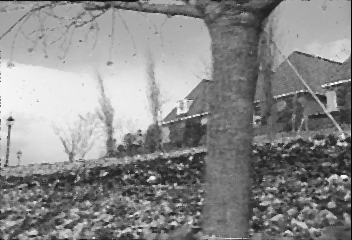

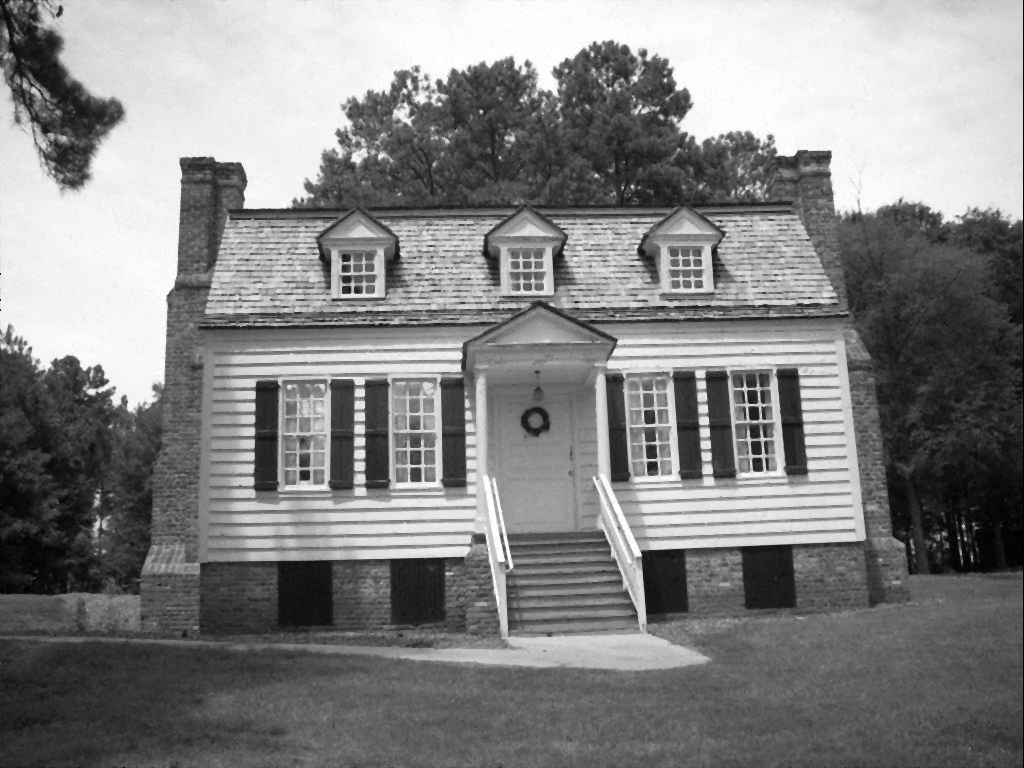

In [0]:
import numpy
from PIL import Image
from google.colab.patches import cv2_imshow


def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    data_final = []
    data_final = numpy.zeros((len(data),len(data[0])))
    for i in range(len(data)):

        for j in range(len(data[0])):

            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(data[i + z - indexer][j + k - indexer])

            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
    return data_final


def main():
    img = Image.open("Noisyimage1.jpg").convert(
        "L")
    img2 = Image.open("Noisyimage2.jpg").convert(
        "L")
    arr = numpy.array(img)
    removed_noise = median_filter(arr, 3) 

    arr2 = numpy.array(img2)
    removed_noise2 = median_filter(arr2, 3)

    cv2_imshow(removed_noise)
    cv2_imshow(removed_noise2)
    


main()

# Anaswer to the question no:3

==================magnitude========
[[254.         254.         254.         ... 249.         251.
  255.        ]
 [  0.           0.           0.         ... 360.62445841 253.
  253.00197628]
 [  3.           3.           3.         ... 255.12545933 254.07085626
  255.00784302]
 ...
 [341.53330731 331.76045575 344.57074745 ... 215.20455386 219.11184359
  338.02366781]
 [ 23.70653918 339.45839215 295.58416737 ... 243.74166652 354.27813932
  338.42281247]
 [348.60436027  46.57252409 315.80056998 ...  22.56102835 255.33115752
  339.70575503]]


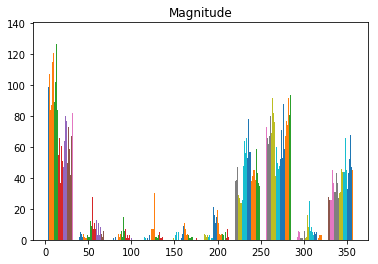

==================orienftation========
[[90.         90.         90.         ... 90.         90.
  90.        ]
 [ 0.          0.          0.         ... 45.          0.
   0.22646435]
 [90.         90.         90.         ...  1.79692527  1.35319195
   0.44936945]
 ...
 [45.11862463 43.41225061 46.99924622 ... 80.09997982 88.16925135
  44.28084388]
 [27.64597536 45.95484125 44.45173176 ... 85.52917916 45.57179518
  47.87436177]
 [44.88378154 14.93141718 36.76103942 ... 77.19573393  2.91843472
  47.38594403]]


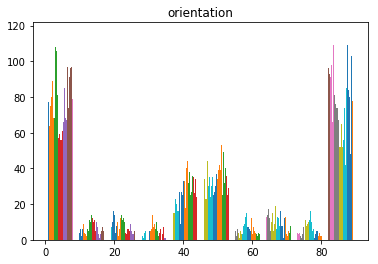

In [0]:
import numpy as np
from numpy import arctan2, fliplr, flipud
import matplotlib.pyplot as plt
import cv2


def gradient(image, same_size=False):
   
    sy, sx = image.shape
    if same_size:
        gx = np.zeros(image.shape)
        gx[:, 1:-1] = -image[:, :-2] + image[:, 2:]
        gx[:, 0] = -image[:, 0] + image[:, 1]
        gx[:, -1] = -image[:, -2] + image[:, -1]

        gy = np.zeros(image.shape)
        gy[1:-1, :] = image[:-2, :] - image[2:, :]
        gy[0, :] = image[0, :] - image[1, :]
        gy[-1, :] = image[-2, :] - image[-1, :]

    else:
        gx = np.zeros((sy-2, sx-2))
        gx[:, :] = -image[1:-1, :-2] + image[1:-1, 2:]

        gy = np.zeros((sy-2, sx-2))
        gy[:, :] = image[:-2, 1:-1] - image[2:, 1:-1]

    return gx, gy


def magnitude_orientation(gx, gy):
    

    magnitude = np.sqrt(gx**2 + gy**2)
    orientation = (arctan2(gy, gx) * 180 / np.pi) % 360

    return magnitude, orientation


if __name__ == '__main__':
    image = cv2.cvtColor(cv2.imread("Q_3.jpg"), cv2.COLOR_BGR2GRAY)

    gx, gy = gradient(image)
    # print('==================value gx========')
    # # print(gx)
    # plt.hist(gx)
    # plt.show()
    # print('==================value gy========')
    # # print(gy)
    # plt.title('')
    # plt.hist(gy)
    # plt.show()

    magnitude, orientation = magnitude_orientation(gx, gy)
    print('==================magnitude========')
    print(magnitude)
    plt.title('Magnitude')
    plt.hist(magnitude)
    #plt.imsave('magnitude.png', magnitude, format='png')
    plt.show()
    print('==================orienftation========')
    print(orientation)
    plt.title('orientation')
    plt.hist(orientation)
    #plt.imsave('orientation.png', orientation, format='png')
    plt.show()


# Anaswer to the question no:4

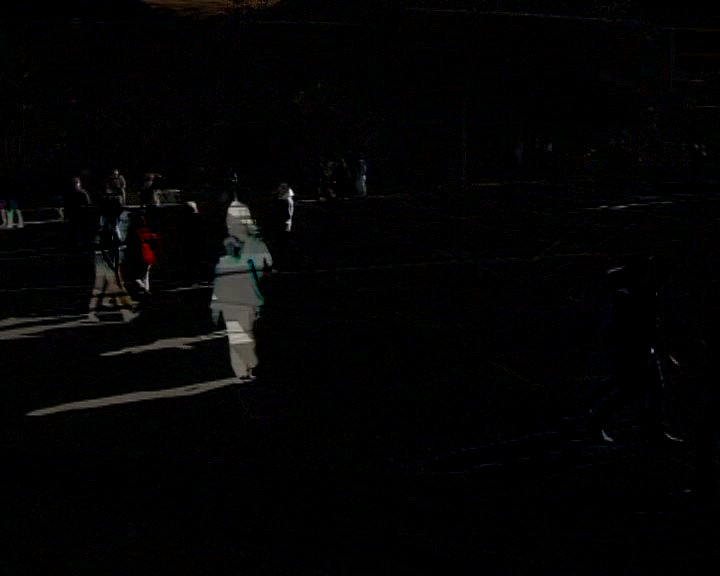

In [0]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

img1 = cv2.imread("walk_1.jpg")
img2 = cv2.imread("walk_2.jpg")
subtraction = img1-img2
sub2 = cv2.subtract(img1, img2)
cv2_imshow(sub2)
cv2.waitKey(0)
cv2.destroyAllWindows()
